<a href="https://colab.research.google.com/github/abhetu/NumericalAnalysis/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 2

This assignment covers several aspects of Linear Regression.
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook.
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom (Kernel Tab -> Restart and Run All)
* Start working on this assignment as soon as possible. If you are a beginner in Python, this might take a long time. One of the objectives of this assignment is to help you learn Python and the sci-kit package.
* Follow [README.md](README.md) for homework submission instructions
* In this notebook, we assume '../data/' location of all data files to be read and written


## Related sklearn material and online tutorials

[sklearn User Guide](https://scikit-learn.org/stable/user_guide.html)

### sklearn data pre-processing
* [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [common_pittfalls](https://scikit-learn.org/stable/common_pitfalls.html)
* [train test split tutorial](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)

### sklearn multiple linear regression
* [tutorial](https://scikit-learn.org/stable/modules/linear_model.html)
* [API documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
* [multiple linear regression tutorial](https://datagy.io/python-sklearn-linear-regression/)

### sklearn polynomial regression
* [generate polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
* [polinomial regression tutorial](https://towardsdatascience.com/polynomial-regression-with-scikit-learn-what-you-should-know-bed9d3296f2)


### correlation
* [correlation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.r_regression.html)





# Linear Regression

In jupyter notebook environment, commands starting with the symbol % are magic commands or magic functions. ```%%timeit``` is one of such function. It basically gives you the speed of execution  of certain statement or blocks of codes.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Q1** Read the ```car_data.csv``` data (we assume **../data/** location of all data files to be read and written) from **data** folder using pandas. Replace the ??? in the code cell below to accomplish this taks.

**A1** Replace ??? with code in the code cell below

In [ ]:
# Replace ??? with code in the code cell below

df = pd.read_csv("/content/sample_data/Car_data.csv")

In [ ]:
# View head of the data to confirm the correctness of your answer
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data cleaning and manipulation

**Q2** Here, you will practice the usage of common data cleaning and manipulation functions in 3 steps.
1. Use isnull() to figure out the number of NaN values per column
2. Remove the column with majority NaN values (if any)
3. Check if there are still NaN values in the dataframe using ```isna()``` method

**A2** Replace ??? with code in the code cell below

In [ ]:
# There is no missing data here on this dataset :
df.isnull().sum()
df.dropna(axis=1, thresh=len(df) / 2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# lets get some statistical information :
df.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


**Q3:** In this task, out of all categorical columns, we focus only on the ```fueltype``` column processing in 2 steps.
1. Use label encoder from sklearn and convert the ```fueltype``` categorical values to numerical values.  
2. Create a new dataframe that contains only the numerical columns.

**A3** Replace ??? with code in the code cell below.

In [ ]:
# Label Encoding for 2-class columns:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['fueltype'] = le.fit_transform(df['fueltype'])

In [ ]:
# Create new dataframe with selected columns
df=df.select_dtypes(include=['number'])

In [ ]:
df.head()

,car_ID,symboling,fueltype,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


**Q4:** Use seaborn histplot to plot a distribution graph for the engine sizes

**A4** Replace ??? with code in the code cell below

<Axes: xlabel='enginesize', ylabel='Count'>

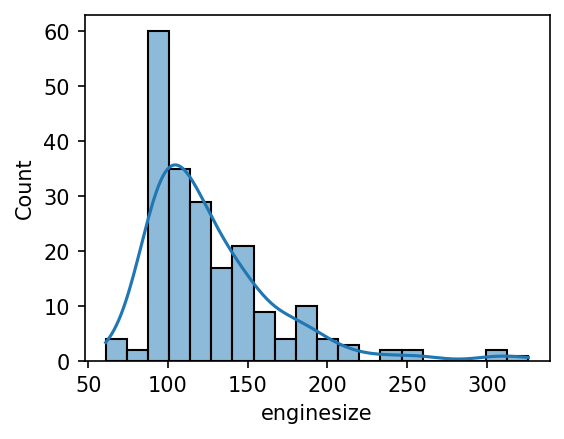

In [ ]:
plt.figure(figsize=(4,3),dpi=150)
sns.histplot(df['enginesize'], bins=20, kde=True)

**Q5:** Use seaborn histplot to plot a distribution graph for the car prices

**A5** Replace ??? with code in the code cell below

<Axes: xlabel='price', ylabel='Count'>

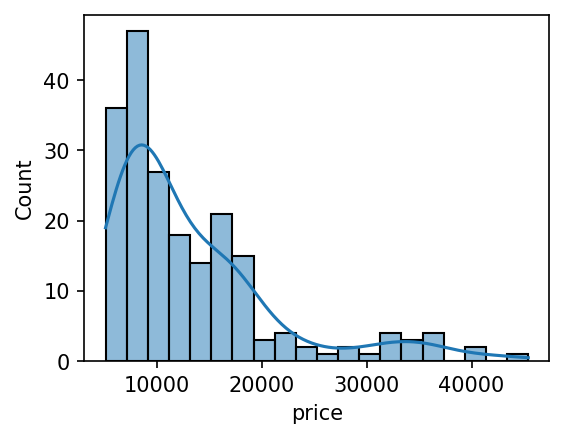

In [ ]:
plt.figure(figsize=(4,3),dpi=150)
sns.histplot(df['price'], bins=20, kde=True)

**Q6:** Use seaborn scatterplot to present the relation between enginesize and the horsepower of a car

**A6** Replace ??? with code in the code cell below

<Axes: xlabel='enginesize', ylabel='horsepower'>

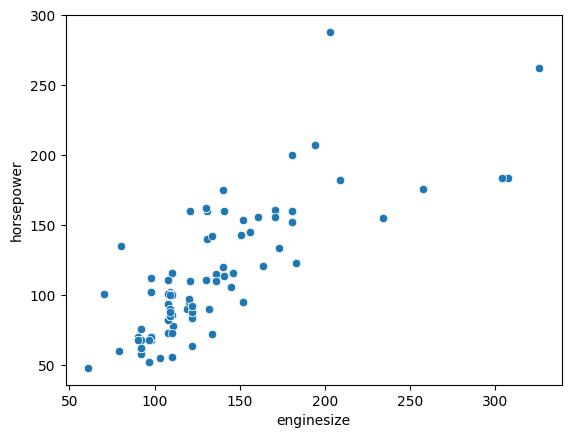

In [ ]:
sns.scatterplot(x=df['enginesize'], y=df['horsepower'])

**Q7:**
There is a correlation between the car price and the horsepower of a car. If horsepower of a car increase, the price of the car also increases most of the time, and in this question you will use the seaborn scatterplot to present the relation between price and horsepower.

Next, use ``hue`` parameter of scatterplot function to illustrate datapoints that relate to specific fueltype category.

**A7** Replace ??? with code in the code cell below

<Axes: xlabel='horsepower', ylabel='price'>

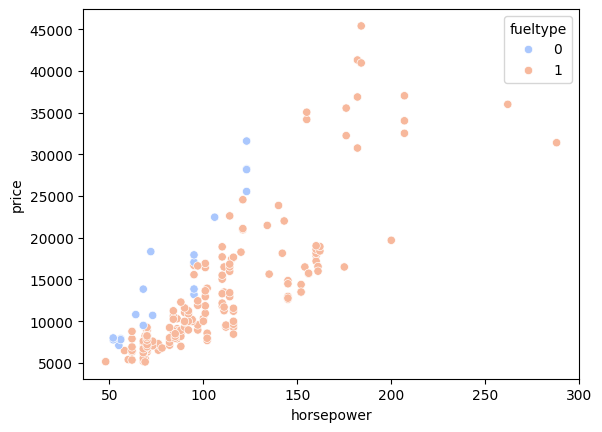

In [ ]:
sns.scatterplot(x=df['horsepower'], y=df['price'], hue=df['fueltype'], palette='coolwarm')

**Q8:** Use pairplot from sns to plot the data frame `df` and justify your feature selection.

**A8:** replace ??? with code in the code cell below.  

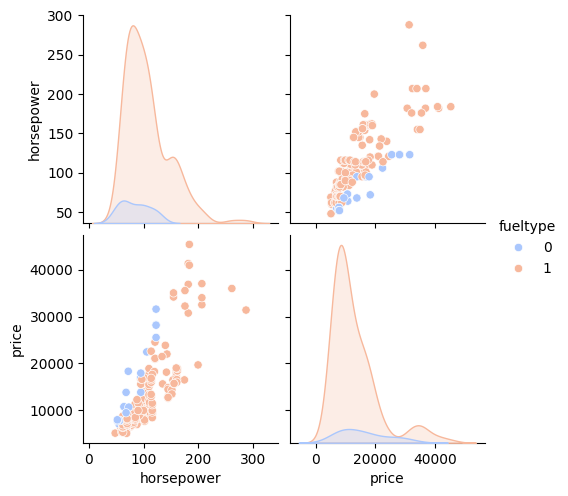

In [ ]:
# 2. Use pairplot from sns to plot our data frame df
sns.pairplot(df[['horsepower', 'price', 'fueltype']], hue='fueltype', diag_kind='kde', palette='coolwarm')


**Q9** Data Visualization:

1. Use heatmap chart from seaborn library to findout the correlation between the columns in our dataset.
2. Update data frame 'df' to contain 5 columns from existing 'df' with the highest correlation to column "price". Also include price column in the updated data frame.

**A9** Replace ??? with code in the code cell below


<Axes: >

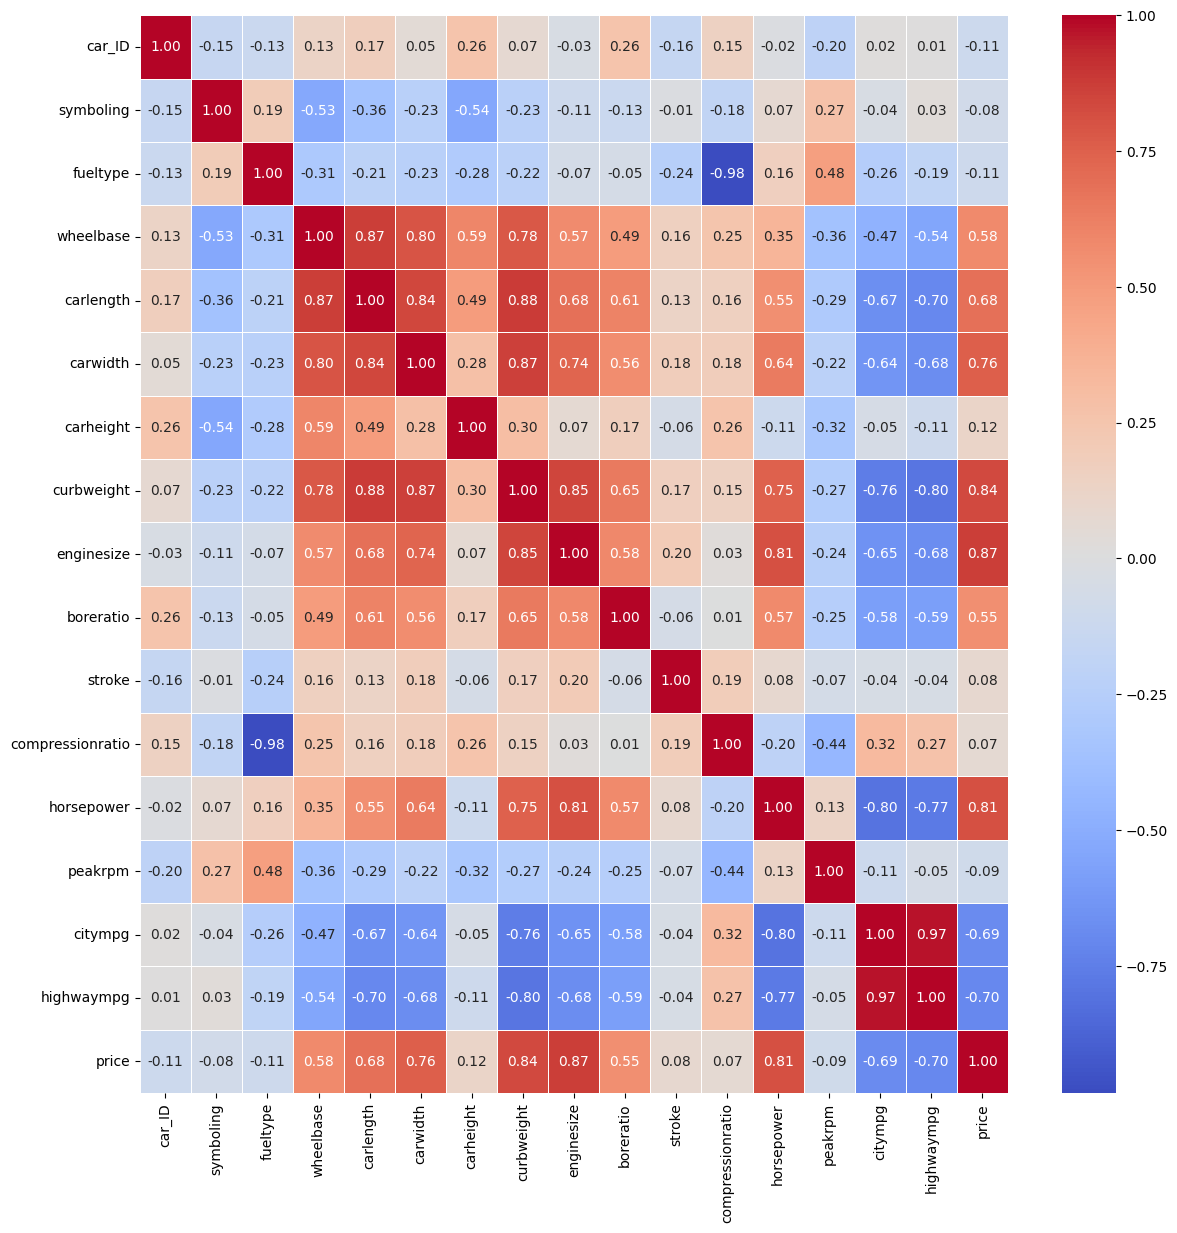

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [ ]:
# Task 2: Update data frame 'df' to contain 5 columns from existing 'df' with the highest correlation to column "price" and the price column itself.

top_features = corr_matrix['price'].abs().sort_values(ascending=False)[1:6].index
df = df[list(top_features) + ['price']]
df.head()

,enginesize,curbweight,horsepower,carwidth,highwaympg,price
0,130,2548,111,64.1,27,13495.0
1,130,2548,111,64.1,27,16500.0
2,152,2823,154,65.5,26,16500.0
3,109,2337,102,66.2,30,13950.0
4,136,2824,115,66.4,22,17450.0


## Data Preparation

**Q10** Pre-processing
1. Assign 'price' column value to y and rest of the columns to x

**A10** Replace ??? with code in the code cell below

In [ ]:
y =df['price']
X =df.drop(columns=['price'])
X

,enginesize,curbweight,horsepower,carwidth,highwaympg
0,130,2548,111,64.1,27
1,130,2548,111,64.1,27
2,152,2823,154,65.5,26
3,109,2337,102,66.2,30
4,136,2824,115,66.4,22
...,...,...,...,...,...
200,141,2952,114,68.9,28
201,141,3049,160,68.8,25
202,173,3012,134,68.9,23
203,145,3217,106,68.9,27


**Q11** Use train_test_split to split the data set as train:test=(75%:25%) ratio.

**A11** Replace ??? with code in the code cell below

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)
# View the shape of your data set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((153, 5), (52, 5), (153,), (52,))

## Regression Task

### Multiple Linear Regression

**Q12**  Fit multiple linear regression model on training data using all predictors, see (i)  [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py); (ii) [scikit-learn linear model](https://scikit-learn.org/stable/modules/linear_model.html)

$ Y = \beta_0 + \beta_1*x_1 + \beta_2*x_2 + ...\beta_p*x_p$

**A12:** Replace ??? with code in the code cell below

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

**Q13:** Model Scoring
1. Calculate the test MSE
2. Print the score from the model using test data

**A13** Replace ??? with code in the code cell below

In [ ]:
# Calculate the score on train and test sets
# Your code goes below
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
y_pred=linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)   # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print("Model R² Score on Test Data:", linear_model.score(X_test, y_test))

Test mean squared error (MSE): 14041064.92
Model R² Score on Test Data: 0.7924747114409564


### Polinomial Regression

**Q14:** Polynomial extension of the feature set captures the non-linear dependencies in the data
1. Create a polinomial feature transformer with degree **TWO** using sklearn library [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
2. Transform the training dataset using the polinomial feature transformer  

**A14** Replace ??? with code in the code cell below

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(X_train)

**Q15:** Train the new model
1. Create a LinearRegression model using sklearn
2. Train the model using the transformed Train data(X_train)/ or Polinomial train data
3. Print the score for the Polinomial Regression for the Train data.  

See (i) [Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py); (ii) Use the transformed X_train features inside the score() function for the correct model scores.

**A15** Replace ??? with code in the code cell below

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)

print("Polynomial Regression R² Score on Train Data:",poly_reg_model.score(poly_features, y_train))

Polynomial Regression R² Score on Train Data: 0.8928327396853509
